# Monte Carlo Methods Exercises

**NOTICE:**
1. You are allowed to work in groups of up to three people but **have to document** your group's\
 members in the top cell of your notebook.
2. **Comment your code**, explain what you do (refer to the slides). It will help you understand the topics\
 and help me understand your thinking progress. Quality of comments will be graded. 
3. **Discuss** and analyze your results, **write-down your learnings**. These exercises are no programming\
 exercises it is about learning and getting a touch for these methods. Such questions might be asked in the\
 final exams. 
 4. Feel free to **experiment** with these methods. Change parameters think about improvements, write down\
 what you learned. This is not only about collecting points for the final grade, it is about understanding\
  the methods. 

In [ ]:
# If you run on google-colab you have to install this package whenever you start a kernel
!pip install gymnasium

In [1]:
#@title **Provided Code:** ``visualize_taxi_policy()`` and ``test_taxi_policy()`` function. 

from IPython import display
import matplotlib.pyplot as plt 
import time
import numpy as np 

def visualize_taxi_policy(env, Q, delay=0.175):
    ''' 
        Visualize a taxi policy. 
        env - Taxi-v3 environment.
        Q - a Q-table with Q[i, k] giving the action-value for action k taken in state i.
    '''
    s, _ = env.reset()
    plt.imshow(env.render())

    while True:
        a = np.argmax(Q[s])
        s,_,terminated,truncated,_ = env.step(a)
        plt.imshow(env.render())
        plt.show()
        display.clear_output(wait=True)
        time.sleep(delay)

        if terminated or truncated:
            break


def test_taxi_policy(env, Q):
    ''' 
        Test a taxi policy. 
        env - Taxi-v3 environment.
        Q - a Q-table with Q[i, k] giving the action-value for action k taken in state i.
        returns: success-rate, average reward per step
    '''

    success = 0
    rewards = []

    for it in range(100):
        s, _ = env.reset()
        while True:
            a = np.argmax(Q[s])
            s,r,terminated,truncated,_ = env.step(a)
            rewards.append(r)
            if terminated:
                success += 1
            if terminated or truncated:
                break
    return success/100, np.mean(rewards)


### Exercise 1 - Q-Learning

**Summary:** In this exercise we will use the ``Taxi-v3`` environment to implement and test   
the Q-learning algorithm. We will use the same algorithm later to extend it with neural nets  
to Deep Q-learning (DQN) which is today used in various state-of-the-art AI models. 

**So, make sure you understand it deeply!**

**Hints:** 
* Use ```env.action_space.n``` to find the number of possible actions.
* Use ```env.observation_space.n``` to find the number of possible states.
* You can sample a random action using ```env.action_space.sample()```.
* You can use ```np.argmax(...)``` with appropriate indexing into the ```Q```   
array to get the index with the highest value (e.g.: for $max_a Q(S_{t+1}, a)$). 

**Provided Code:** The cells below contains code to initialize the ```Taxi-v3``` environment.  
Use the ```test_taxi_policy(env, Q)``` method and ```visualize_taxi_policy(env, Q)``` with your   
Q-table as argument to test and visualize the greedy policy derived from a Q table. 


**Your Tasks in this exercise:**
1. Implement the Q-learning algorithm
2. Test your implementation using using the ```test_taxi_policy(env, Q)```
3. Answer and discuss:
    * Why is Q-learning an off-policy algorithm?
    * What is the role of the epsilon-greedy strategy in Q-learning?
    * Does the Q-learning algorithm converge without reducing the exploration rate over time?
    


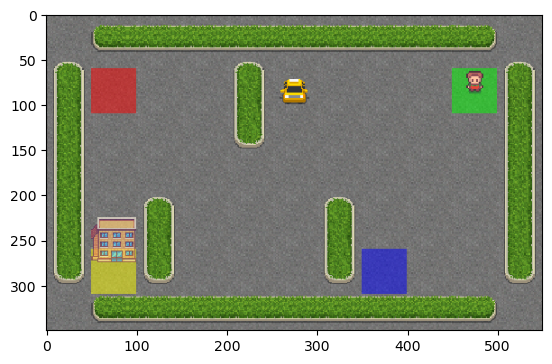

In [2]:
import gymnasium as gym
env = gym.make('Taxi-v3', render_mode='rgb_array')

s_t = env.reset()
plt.imshow(env.render())

### Exercise 2 - Sarsa


In this exercise we will use the ``Taxi-v3`` environment to implement and test   
the Sarsa algorithm. 


**Hints:** 
* Use ```env.action_space.n``` to find the number of possible actions.
* Use ```env.observation_space.n``` to find the number of possible states.
* You can sample a random action using ```env.action_space.sample()```.
* You can use ```np.argmax(...)``` with appropriate indexing into the ```Q```   
array to get the index with the highest value (e.g.: for $max_a Q(S_{t+1}, a)$). 



**Provided Code:** The cells below contains code to initialize the ```Taxi-v3``` environment.  
Use the ```test_taxi_policy(env, Q)``` method and ```visualize_taxi_policy(env, Q)``` with your   
Q-table as argument to test and visualize the greedy policy derived from a Q table. 


**Your Tasks in this exercise:**
1. Implement the Sarsa algorithm
    * Implement a flag that activates exploration decay (reducing the learning rate)   
    over time. 
2. Test your implementation using using the ```test_taxi_policy(env, Q)```
3. Compare the convergence of the algorithm with exploration decay and without
4. Answer and discuss:
    * Why is Sarsa an on-policy algorithm?
    * What is the impact of exploration decay in Sarsa?

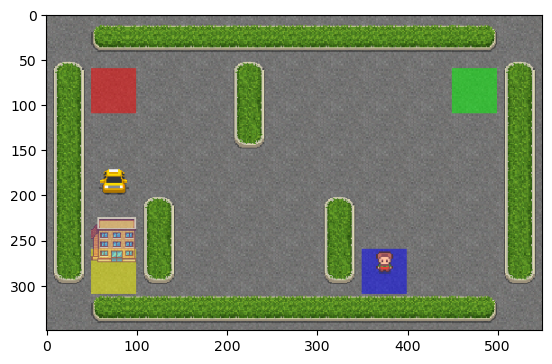

In [14]:
import gymnasium as gym
env = gym.make('Taxi-v3', render_mode='rgb_array')

s_t = env.reset()
plt.imshow(env.render())